## Bivariate Analysis

    
Through bivariate analysis, we try to analyze two variables simultaneously. As opposed to univariate analysis where we check the characteristics of a single variable, in the bivariate analysis we try to determine if there is any relationship between two variables.

&nbsp;

There are essentially 3 major scenarios that we will come across when we perform bivariate analysis.
1. Both variables of interest are qualitative
2. One variable is qualitative and the other is quantitative
3. Both variables are quantitative

&nbsp;

For the purpose of this exercise, we will explore a few most popular techniques to perform bivariate analysis.

The following plots are not limited to the headings they are under. They are the options available to us in the event of a specific situation.

### Numerical  vs. Numerical
    1. Scatterplot
    2. Line plot
    3. Heatmap for correlation
    4. Joint plot

### Categorical vs. Numerical
    1. Bar chart
    2. Violin plot
    3. Categorical box plot
    4. Swarm plot
    

### Two Categorical Variables 
    1. Bar chart
    2. Grouped bar chart
    3. Point plot

### Case Study (Suicide Rates Overview 1985 to 2016)

Our aim is to make general analysis of suicide rates.

Lets start using the above techniques on a practical dataset. The data is about suicide rates from 1985 to 2016.

Source: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


Dataset Feature List:

country

year

sex

age

suicides_no

population

suicides/100k pop

country-year

HDI for year

gdp_for_year

gdp_per_capita

generation

### 1.1 Loading the libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### 1.2 Loading the dataset 

In [3]:
data=pd.read_csv('datasets\SuicideRateData.csv')

### 1.3 Checking the first 5 rows in the dataset

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### 1.4 Checking the descriptive statistics of the data

In [5]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


### 1.5 Checking the label of each column in the Dataframe

In [6]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

### 1.6 Checking the shape of Dataframe

In [7]:
data.shape

(27820, 12)

### 1.7 Counting the data types present in the data

In [8]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

### 1.8 Checking the short summary of the DataFrame

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### 1.9  Checking for missing values in the dataset

In [10]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
gdp_for_year ($),0,0.000000


In [11]:
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe() #descriptive stats of continuous columns

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


### 1.10 Frequency table for Age 

One-Way Tables

In [12]:
my_tab = pd.crosstab(index=data["age"],  # Make a crosstab
                     columns="count")                  # Name the count column
my_tab

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


### 1.11 Bar plot to check the Number of Suicides in top Countries

### This is an example of Numerical vs Categorical.

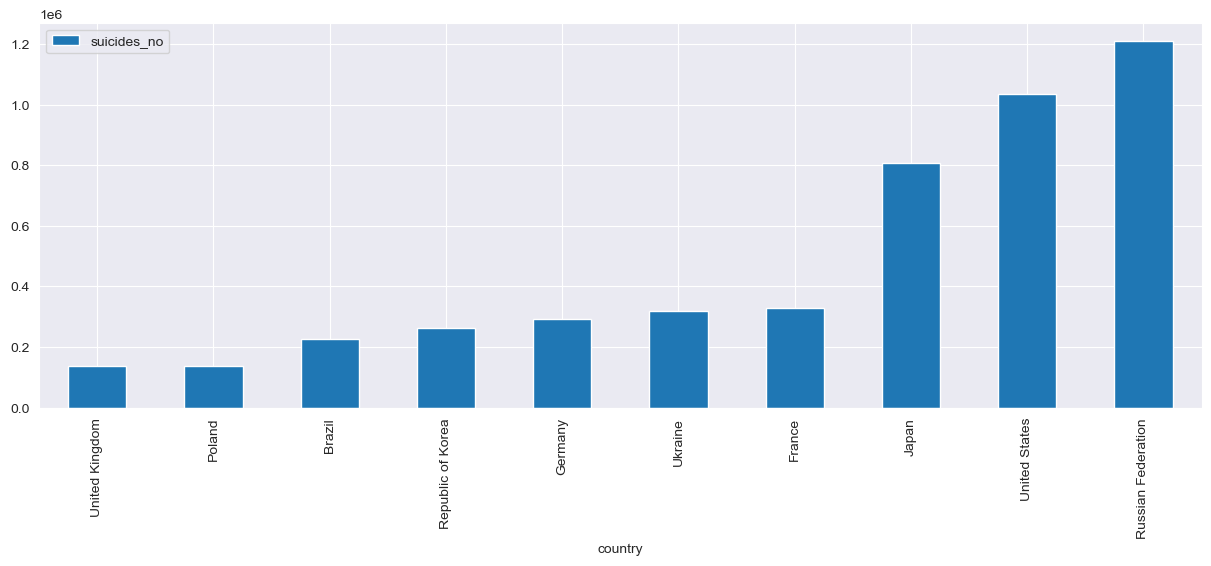

In [13]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country',
                                                                                                           y='suicides_no',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

* Russia has the highest number of suicides followed by the US and Japan.
* Russia, US and Japan have exceptionally high counts of suicides compared to the others in the lot.

### 1.12 Bar plot to check the bottom 10 countries with the lowest number of suicides

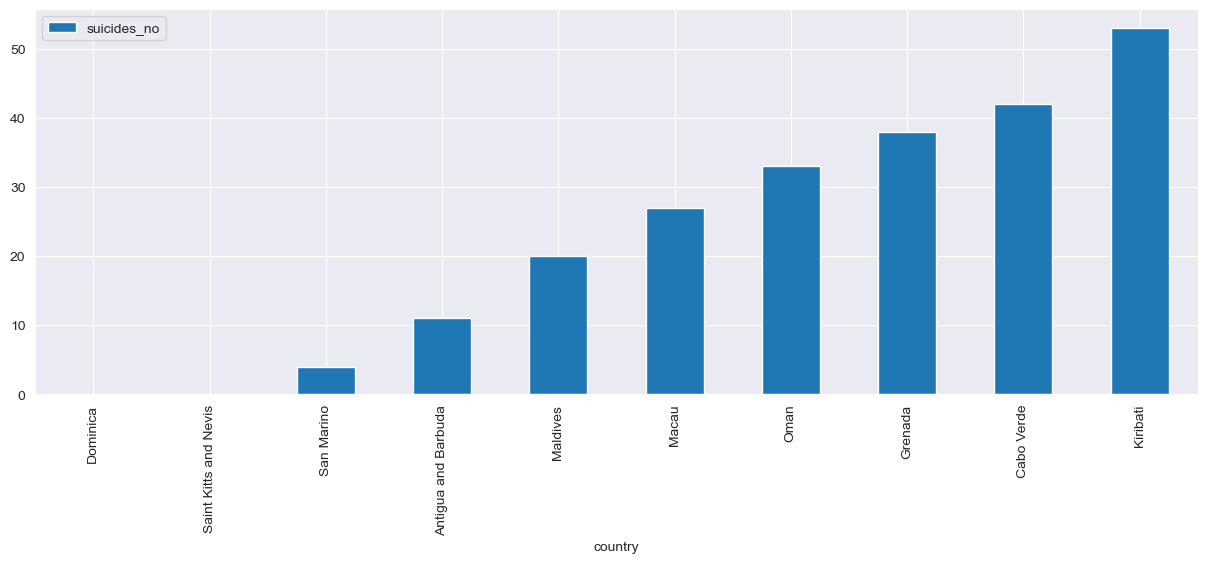

In [14]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=True).head(10).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))

plt.show()

### 1.13 Bar plot for Number of Suicides Vs Age

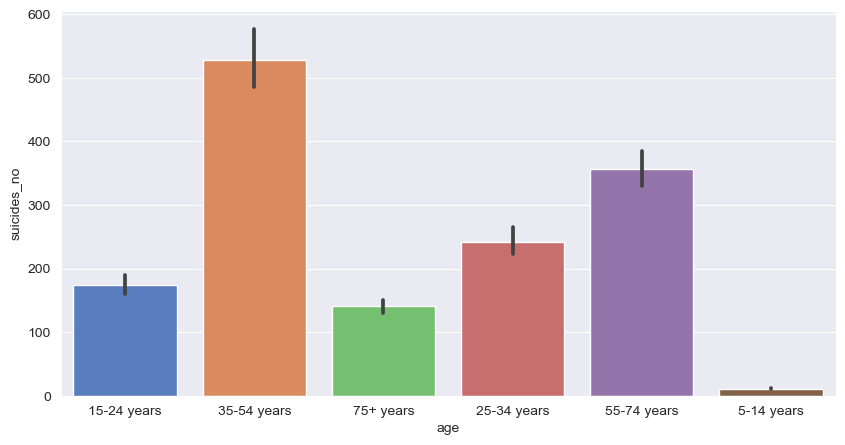

In [15]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='age', y='suicides_no', data=data, palette='muted')  # barplot

### 1.14 Bar plot for Number of Suicides Vs Sex

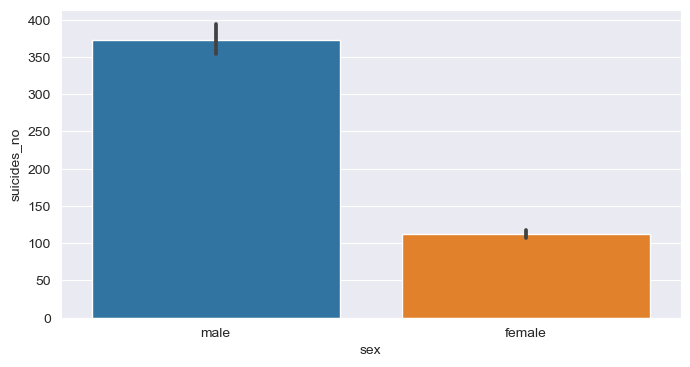

In [16]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="sex", y="suicides_no", data=data)

### 1.15 Bar plot for Number of Suicides Vs generation

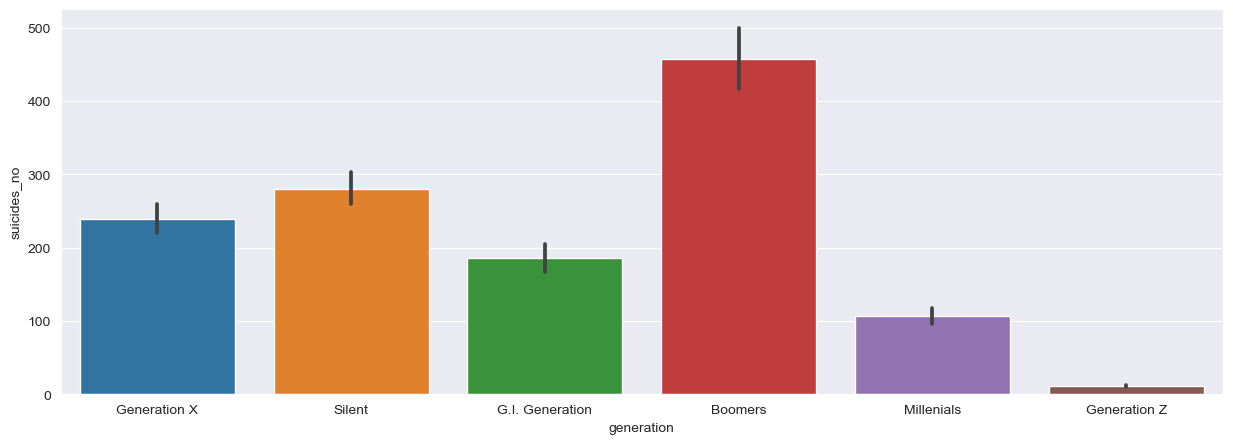

In [17]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x='generation', y='suicides_no', data=data)

* Suicides are the highest among the Boomers and lowest among Generation Z

### 1.15 Scatter plot for Number of Suicides Vs population

### This is an example of  Numerical  vs. Numerical

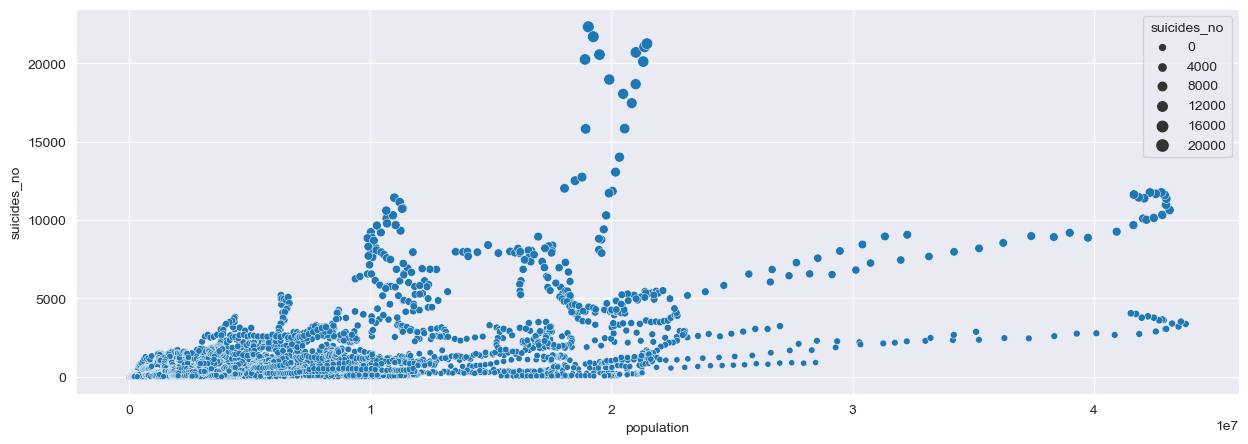

In [18]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=data['population'],y='suicides_no', data=data, size = "suicides_no") # scatter plot

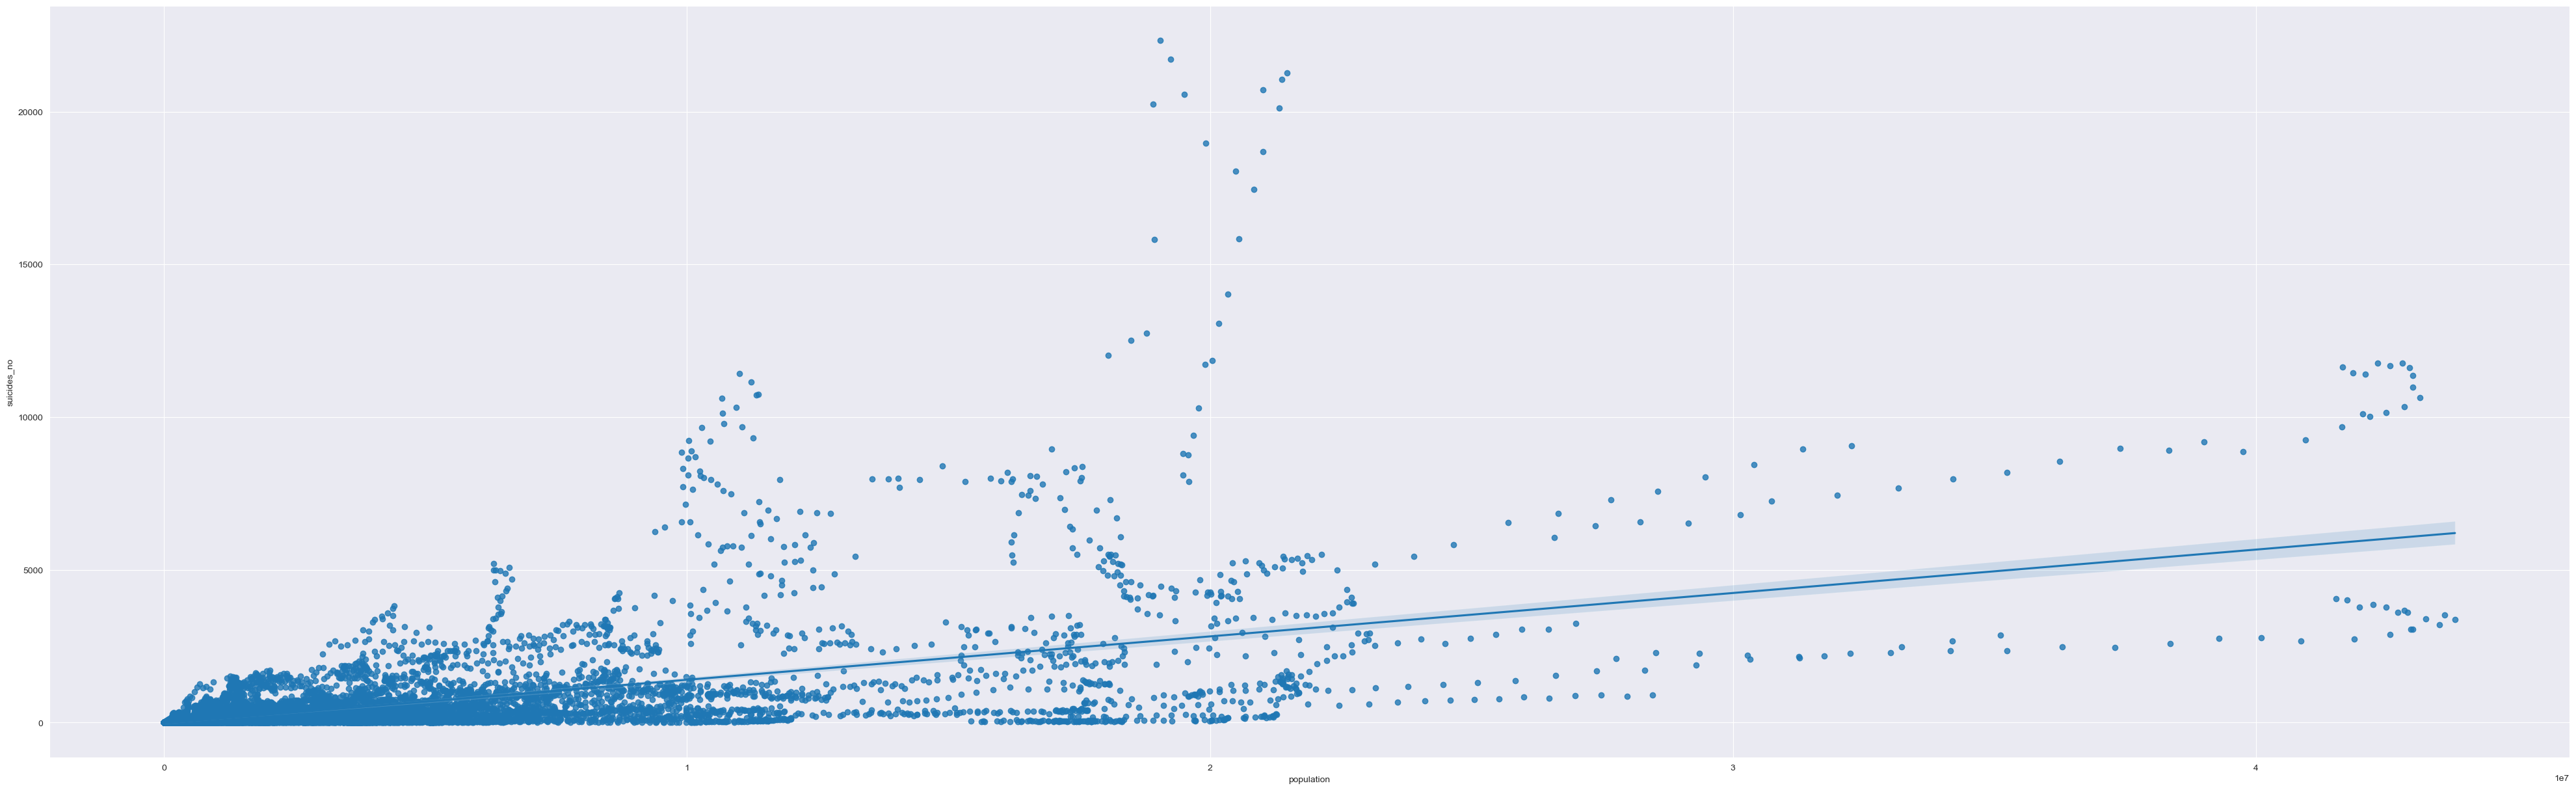

In [19]:
figure = plt.figure(figsize=(50,15))

ax = sns.regplot(x='population',y='suicides_no', data=data ) # regression plot - scatter plot with a regression line

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

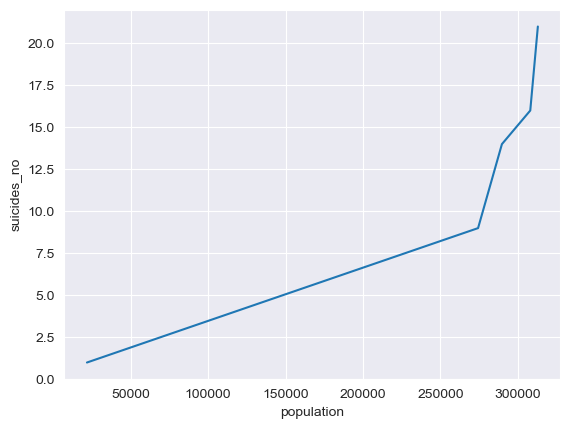

In [20]:
#Here we plotting a line plot.
sns.lineplot(x='population',y='suicides_no', data=data.head() )

### Scatter plot for Number of Suicides/100k Population Vs GDP Per Capita

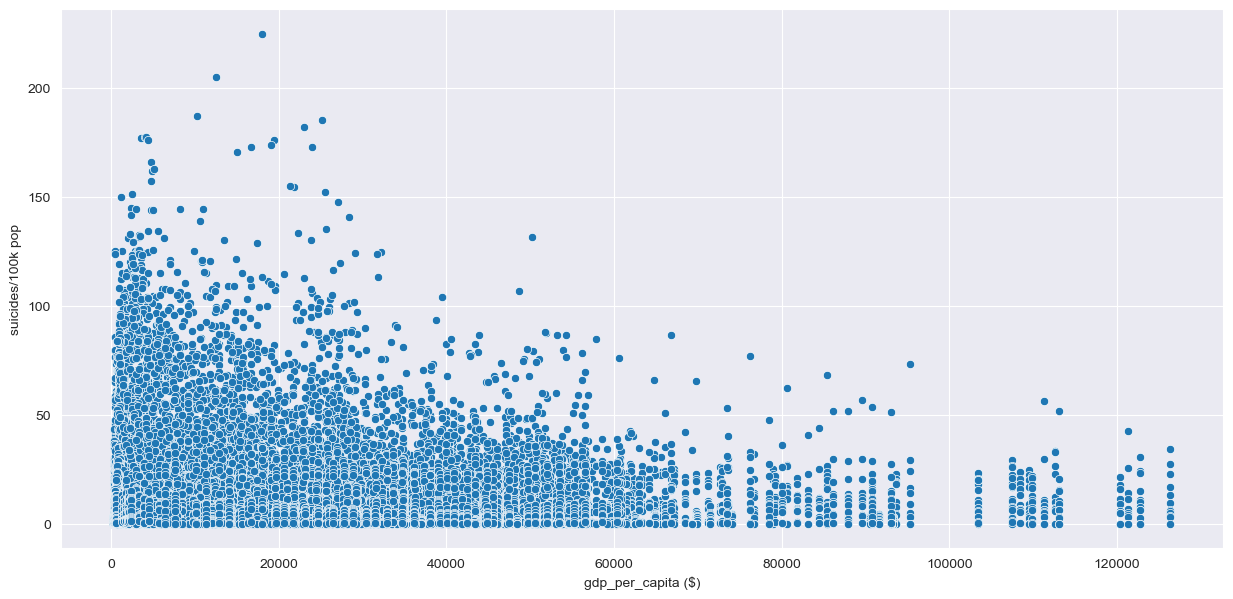

In [21]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data) # scatter plot 
plt.show()

* Looks like higher suicide rates are a bit more prevalent in countries with lower GDP Per Capita.
* However, it doesn't look like there is any significant correlation between the two.

### Checking the correlation among pairs of continuous variables

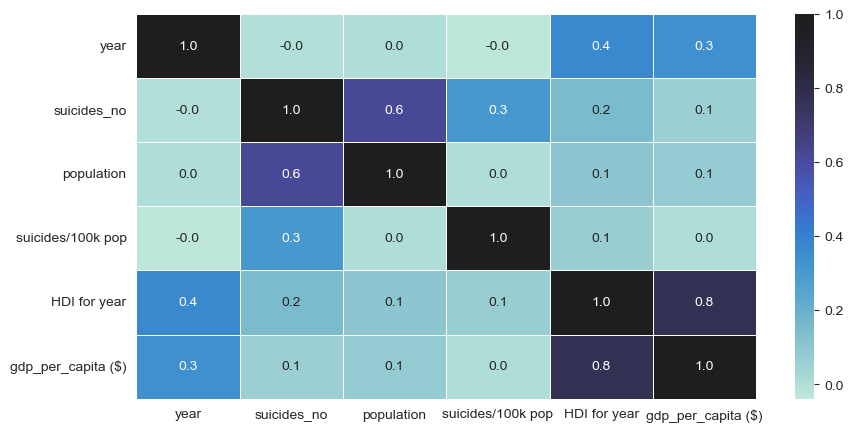

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

* Instead of doing a simple df.corr(), we can use the heatmap when there are a large number of variables.
* The color helps in picking out the most correlated easily.
* The darker the color higher the correlation.
* None of the attributes seem to have a correlation of real significance.
* Some obvious correlations are that in a larger population, it is very likely that the number of suicides will be more in number.
* Human Development Index - gdp per capita is the only pair with the high correlation. 

### 1.17.1 Bar plot to check Number of suicides by sex and age (three variables used to generate a single plot)

### This is an example of 1 Numerical and 2 Categorical variables.

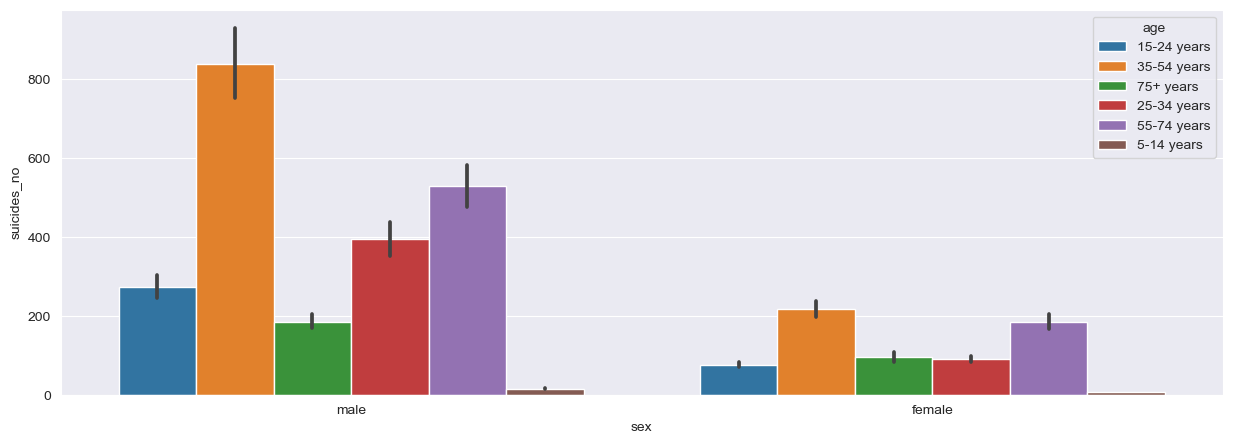

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='age')
plt.show()

### 1.17.2 Bar plot to check Number of suicides by sex and Generation(three variables used to generate a single plot)

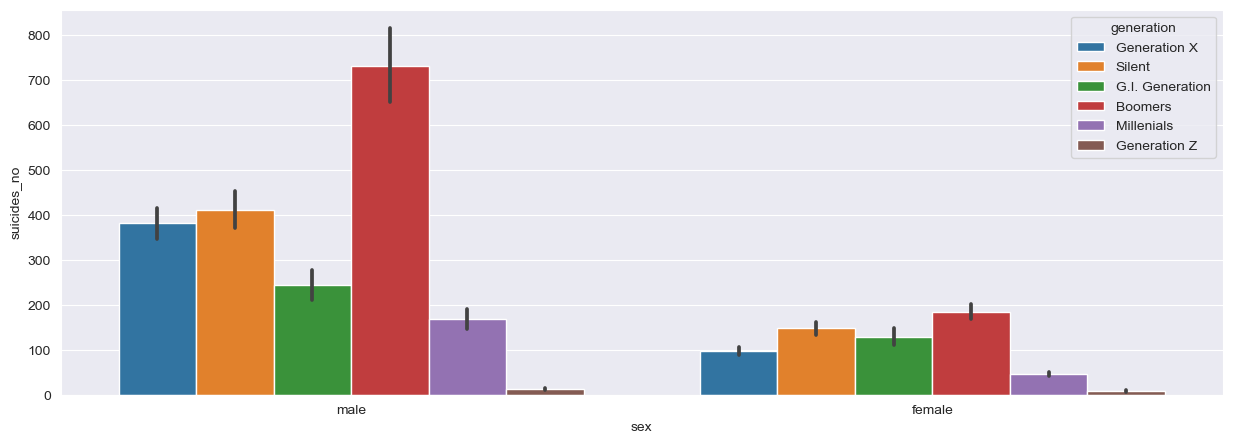

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='sex',y='suicides_no',hue='generation')
plt.show()

* Suicides in males apart from being higher has a slight variation in distribution across generations compared to the suicides of females across generation.

* Suicides are high among Boomers, both male and female.

### 1.18 Checking the No.of suicides: Country Vs Sex

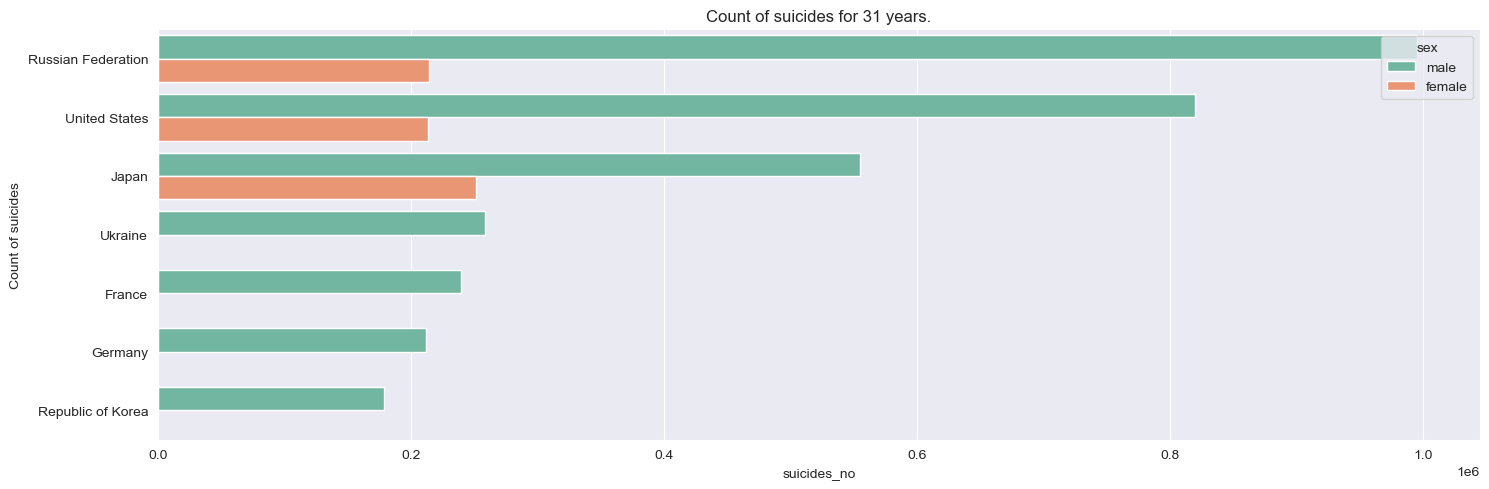

In [25]:
suic_sum_m = data['suicides_no'].groupby([data['country'],data['sex']]).sum()  # number of suicides by country and sex
suic_sum_m = suic_sum_m.reset_index().sort_values(by='suicides_no',ascending=False) # sort in descending order
most_cont_m = suic_sum_m.head(10)  # getting the top ten countries in terms of suicides

fig = plt.figure(figsize=(15,5))
plt.title('Count of suicides for 31 years.')

sns.barplot(y='country',x='suicides_no',hue='sex',data=most_cont_m,palette='Set2');

plt.ylabel('Count of suicides')
plt.tight_layout()

*In comparison to other countries with high suicide rates, Japan has a larger proportion of female suicides.

### Average number of suicides across each generation for a given gender along with the confidence intervals - Point Plot

<Figure size 500x1500 with 0 Axes>

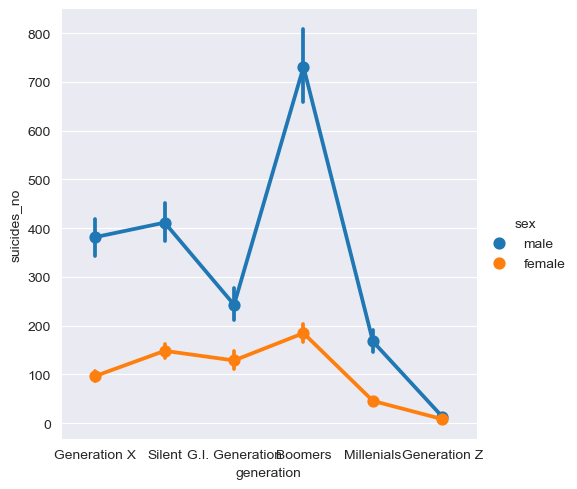

In [26]:
plt.figure(figsize=(5,15))

sns.factorplot(x="generation", y="suicides_no", hue = 'sex',  data=data)
plt.show()

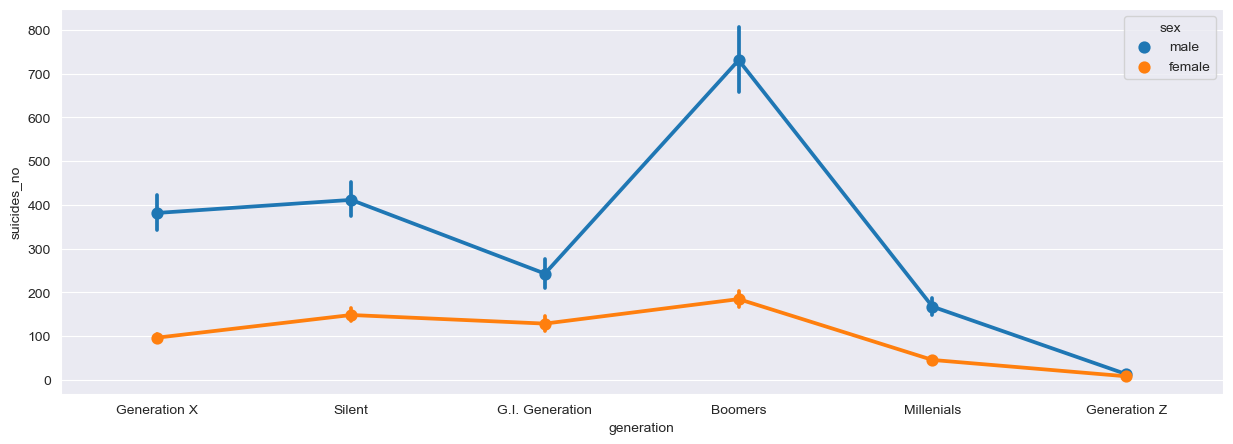

In [27]:
plt.figure(figsize=(15,5))

sns.pointplot(x="generation", y="suicides_no", hue = 'sex',  data=data)
plt.show()

* The graph tells us the average suicides along with the confidence intervals. 
* Suicides among females, in general, don't seem to be fluctuating a lot.
* Average suicides of Gen-Z are almost equally distributed across genders.

### Distribution of population across each generation - Violin plot

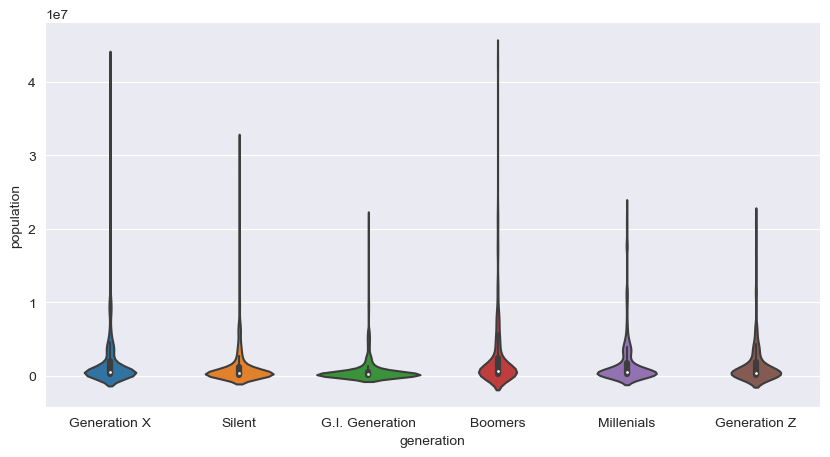

In [28]:
plt.figure(figsize=(10,5))
sns.violinplot(x=data.generation, y=data['population'])
plt.show()

* The plot is similar to a box plot but here, we get a density function.
* Distribution of population across every generation is highly skewed.
* Potential a lot of outliers.
* Try it yourself -  Go ahead and check if really there are a lot of outliers in populations across each generation
  (Hint: use a boxplot).

### Checking trends with the Temporal Data 

Temporal data is simply data that represents a state in time, such as the land-use patterns of Hong Kong in 1990,
or total rainfall in Honolulu on July 1, 2009. Temporal data is collected to analyze weather patterns and other environmental variables, monitor traffic conditions, study demographic trends, and so on. This data comes from many sources ranging
from manual data entry to data collected using observational sensors or generated from simulation models. 

### Checking pattern using Trend plot (1985-2015) suides Rate Vs Years

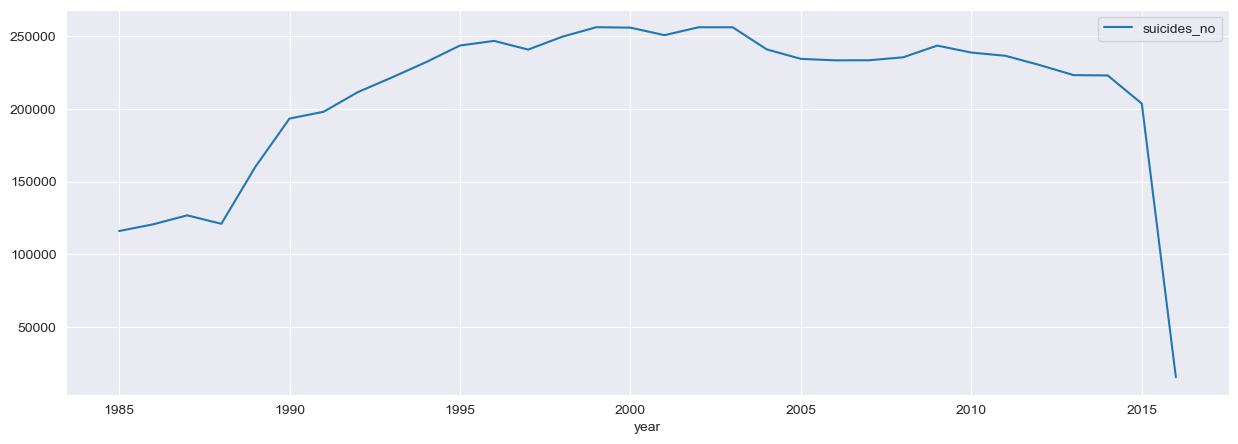

In [29]:
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

### Checking the pattern using Trend plot (1985-2015) Population Vs Years

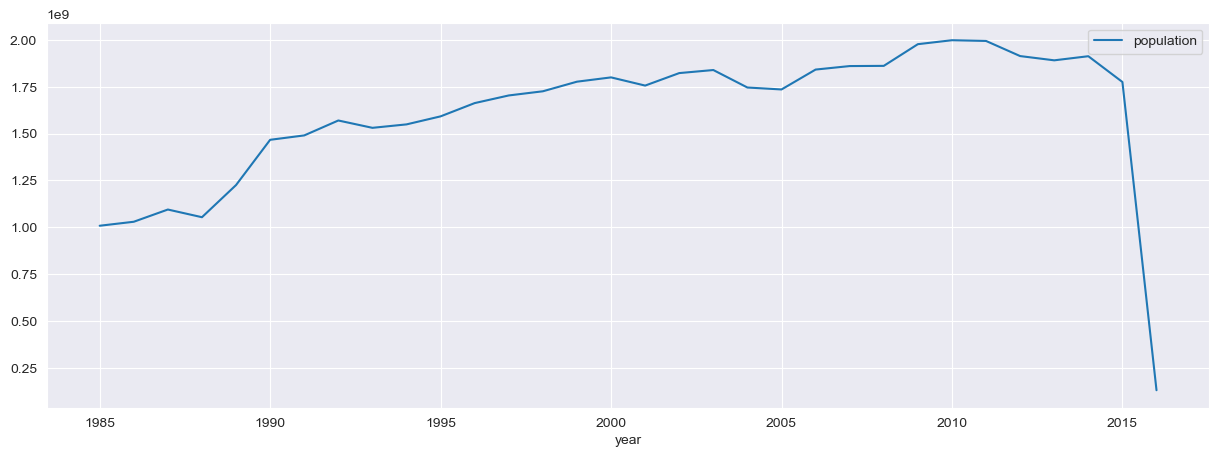

In [30]:
data[['year','population']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()

### Checking the pattern using Trend plot (1985-2015) suicides/100k pop Vs Years

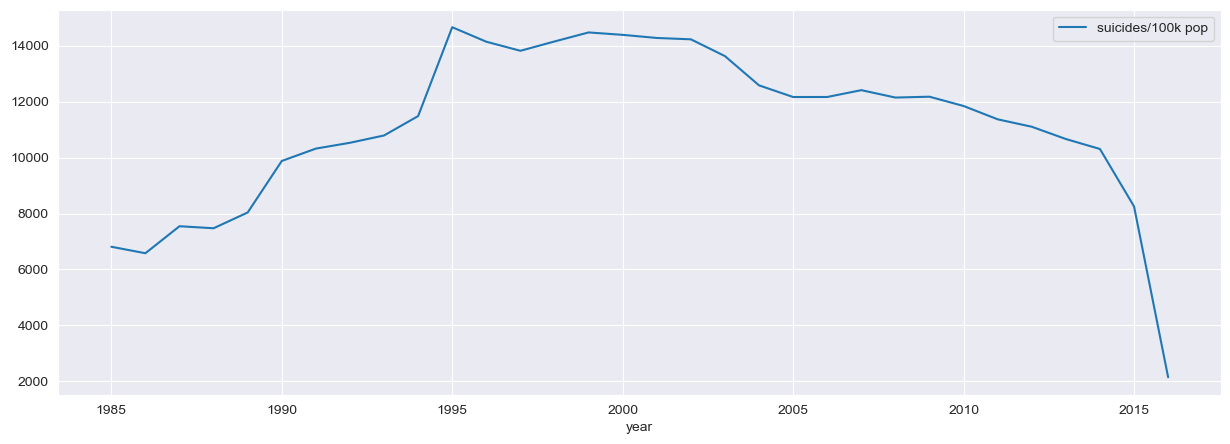

In [31]:
data[['year','suicides/100k pop']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()